# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Brandon Tatani - 931529

## <span style="color:blue">  Numerical exercises 2</span>

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

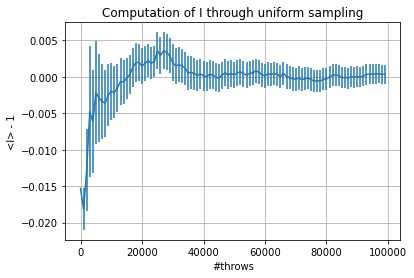

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

M = 100000
N = 100
L = M/N
x = np.arange(N)*L

dr = pd.read_csv('output2_11.csv')
y = dr['I']
err = dr['errore']

plt.errorbar(x, y, yerr=err)
plt.grid('show')
plt.title('Computation of I through uniform sampling')
plt.xlabel('#throws')
plt.ylabel('<I> - 1')
plt.show()

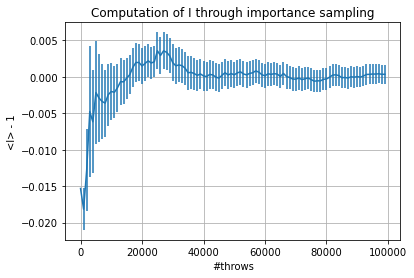

In [6]:
dr2 = pd.read_csv('output2_12.csv')

y = dr['I']
err = dr['errore']

plt.errorbar(x, y, yerr=err)
plt.grid('show')
plt.title('Computation of I through importance sampling')
plt.xlabel('#throws')
plt.ylabel('<I> - 1')
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

[1.00397541]


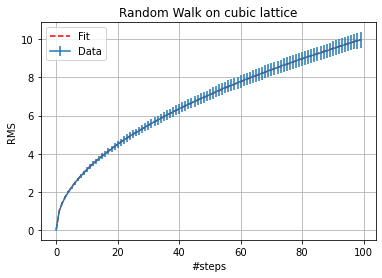

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Random Walk on a cubic lattice

M = 10000
N = 100

#Fitting model
def fmodel(x, k):
    return k*np.sqrt(x)

#Loading Data
df = pd.read_csv('output2_21.csv')

x = np.arange(N)
y = df['RMS']
err = df['Errore']

#Fitting Data
popt, pcov = curve_fit(fmodel, x, y)
print(popt)

#Plot
plt.errorbar(x, y, yerr=err, label='Data')
plt.plot(x, fmodel(x, *popt), 'r--', label = 'Fit')
plt.grid('show')
plt.title('Random Walk on cubic lattice')
plt.xlabel('#steps')
plt.ylabel('RMS')
plt.legend()
plt.show()

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Coefficiente k del fit:  [0.9985669]


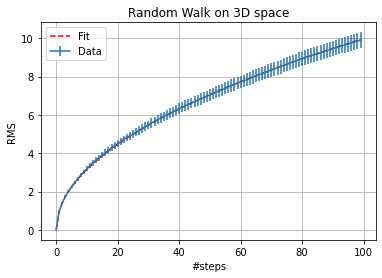

In [8]:
# Random Walk on 3D space

#Loading Data
df = pd.read_csv('output2_22.csv')

y = df['RMS']
err = df['Errore']

#Fitting Data
popt, pcov = curve_fit(fmodel, x, y)
print('Coefficiente k del fit: ', popt)

#Plot
plt.errorbar(x, y, yerr=err, label='Data')
plt.plot(x, fmodel(x, *popt), 'r--', label = 'Fit')
plt.grid('show')
plt.title('Random Walk on 3D space')
plt.xlabel('#steps')
plt.ylabel('RMS')
plt.legend()
plt.show()

Coefficiente k del fit: [0.04255153]


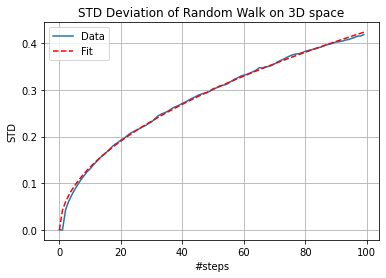

In [9]:
#Fitting Data
popt, pcov = curve_fit(fmodel, x, err)
print('Coefficiente k del fit:', popt)

#Plot
plt.plot(x, err, label='Data')
plt.plot(x, fmodel(x, *popt), 'r--', label = 'Fit')
plt.grid('show')
plt.title('STD Deviation of Random Walk on 3D space')
plt.xlabel('#steps')
plt.ylabel('STD')
plt.legend()
plt.show()

The results, as shown above, have a diffusive behavior. As predicted from theory the value of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ should have the trend of $\sqrt{N}$; wich is true for ours model.
We could also expect the value of the **STD** to have the same trend. This is well depicted in the last figure.